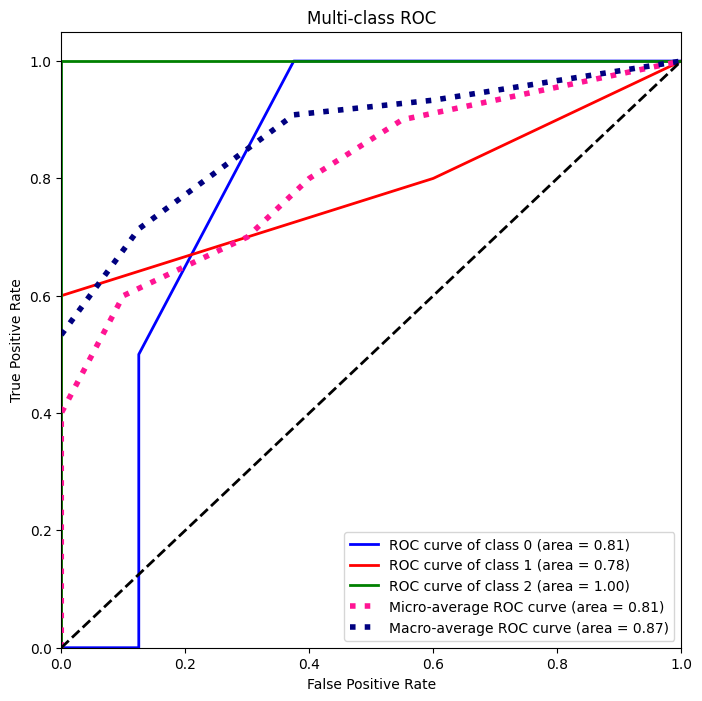

AUC for class 0: 0.8125
AUC for class 1: 0.78
AUC for class 2: 1.0
Micro-average AUC: 0.81
Macro-average AUC: 0.8745833333333333


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# 真实标签和预测分数
y_true = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0],
                   [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0]])
y_scores = np.array([[0.1, 0.2, 0.7], [0.1, 0.6, 0.3], [0.5, 0.2, 0.3], [0.1, 0.1, 0.8],
                     [0.4, 0.2, 0.4], [0.6, 0.3, 0.1], [0.4, 0.2, 0.4], [0.4, 0.1, 0.5],
                     [0.1, 0.1, 0.8], [0.1, 0.8, 0.1]])

n_classes = y_true.shape[1]

# 计算每个类别的ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算micro-average ROC曲线和AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# 计算macro-average ROC曲线和AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# 计算平均TPR
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制所有的ROC曲线
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


for i in range(n_classes):
    print('AUC for class {}: {}'.format(i, roc_auc[i]))
print('Micro-average AUC: {}'.format(roc_auc["micro"]))
print('Macro-average AUC: {}'.format(roc_auc["macro"]))


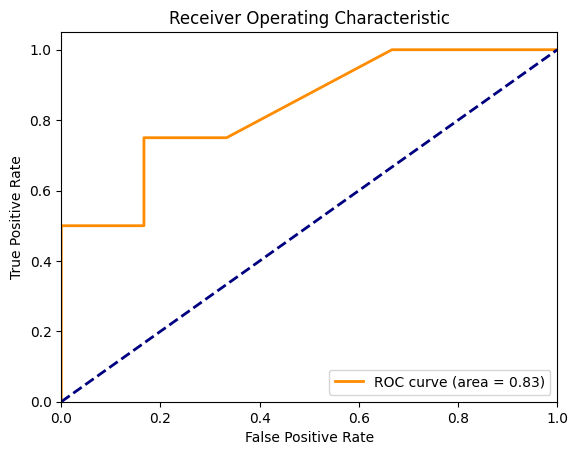

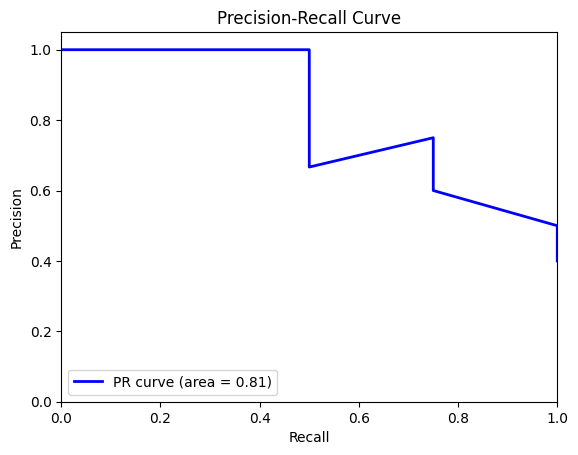

ROC AUC: 0.8333333333333333
PR AUC: 0.8145833333333332


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# 真实标签和预测概率
y_true = np.array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])
y_score = np.array([0.9, 0.4, 0.2, 0.6, 0.5, 0.4, 0.7, 0.4, 0.65, 0.35])

# 计算ROC曲线的FPR和TPR
fpr, tpr, _ = roc_curve(y_true, y_score)
# 计算ROC曲线的AUC值
roc_auc = roc_auc_score(y_true, y_score)

# 计算PR曲线的Precision和Recall
precision, recall, _ = precision_recall_curve(y_true, y_score)
# 计算PR曲线的AUC值
pr_auc = auc(recall, precision)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 绘制PR曲线
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# 输出ROC和PR曲线的AUC值
print('ROC AUC:', roc_auc)
print('PR AUC:', pr_auc)
